In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df= pd.read_csv('AB_NYC_2019.csv')
#read data from newyork airbnb

In [3]:
df.head()
#show top of the data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df = df.sort_values(by=["price"], ascending=False)
df['rank']=tuple(zip(df.price))
df['rank']=df.groupby('price',sort=False)['rank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values
df.head()
#sort and rank the data according to price from highest to lowest

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,rank
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83,0
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83,0


In [5]:
df.drop(["rank"],axis=1,inplace=True)
#remove the rank column

In [6]:
# Get names of indexes for which column minimum_nights has value more than 30
indexNames = df[ df['minimum_nights'] >= 31 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [47]:
# Get names of indexes for which column minimum_nights has value more than 30
indexPrice = df[ df['price'] == 0 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexPrice , inplace=True)

In [48]:
df.reset_index(inplace=True,drop=True)
df.head()
#reset the index headers

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
1,1-BR Lincoln Center,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.73,1,83
2,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.73,1,365
3,Spanish Harlem Apt,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0
4,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,1,251


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48137 entries, 0 to 48136
Data columns (total 12 columns):
name                              48122 non-null object
neighbourhood_group               48137 non-null object
neighbourhood                     48137 non-null object
latitude                          48137 non-null float64
longitude                         48137 non-null float64
room_type                         48137 non-null object
price                             48137 non-null int64
minimum_nights                    48137 non-null int64
number_of_reviews                 48137 non-null int64
reviews_per_month                 48137 non-null float64
calculated_host_listings_count    48137 non-null int64
availability_365                  48137 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 4.4+ MB


In [50]:
df.shape

(48137, 12)

In [51]:
df.tail()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48132,Room with a view,Brooklyn,Williamsburg,40.70959,-73.95693,Private room,10,1,0,0.73,1,83
48133,Large furnished 2 bedrooms- - 30 days Minimum,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0.73,4,137
48134,"Quiet, Cozy UES Studio Near the Subway",Manhattan,Upper East Side,40.76844,-73.95341,Entire home/apt,10,3,10,0.39,1,0
48135,Gigantic Sunny Room in Park Slope-Private Back...,Brooklyn,Sunset Park,40.66242,-73.99464,Entire home/apt,10,1,14,1.06,1,4
48136,"Girls only, cozy room one block from Times Square",Manhattan,Hell's Kitchen,40.75812,-73.98935,Shared room,10,1,2,0.08,1,0


In [11]:
df.drop(['id','host_id','host_name','last_review'],axis=1,inplace=True)
#remove the id, host_id, host_name and the last review

In [12]:
df.isnull().sum()
#detect the missing values in the data

name                                15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9744
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [13]:
def impute_median(series):
    "This function fills in the missing data using the median"
    return series.fillna(series.median())


In [14]:
df.reviews_per_month=df["reviews_per_month"].transform(impute_median)
#fill in the missing reviews_per_month using the median

In [15]:
df.isnull().sum()
#check for the any missing data

name                              15
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [16]:
df.columns

Index(['name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [17]:
df.nunique()
#number of unique values

name                              47172
neighbourhood_group                   5
neighbourhood                       221
latitude                          18943
longitude                         14665
room_type                             3
price                               661
minimum_nights                       30
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

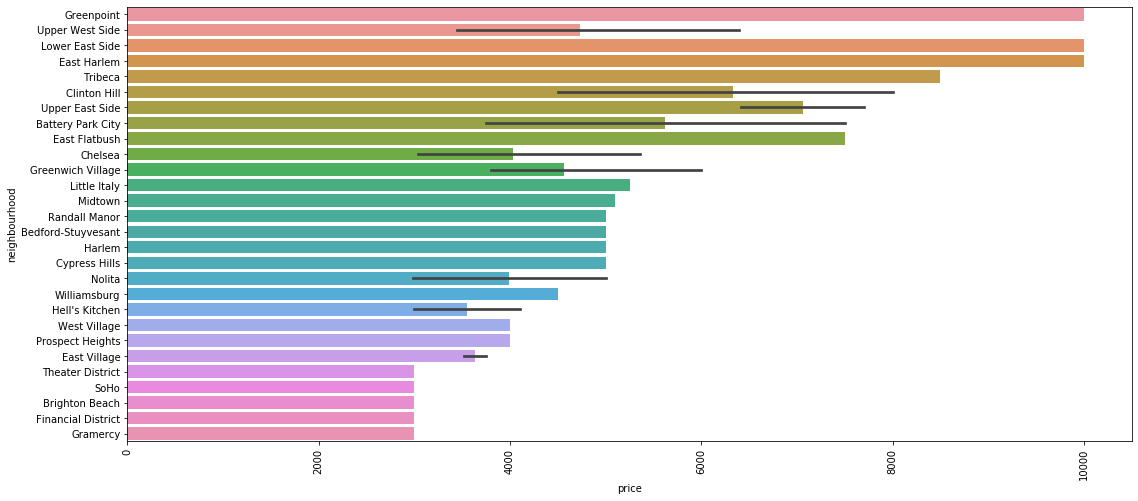

In [18]:
#neighbourhood - price
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x=df.price[:50], y=df.neighbourhood[:50]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


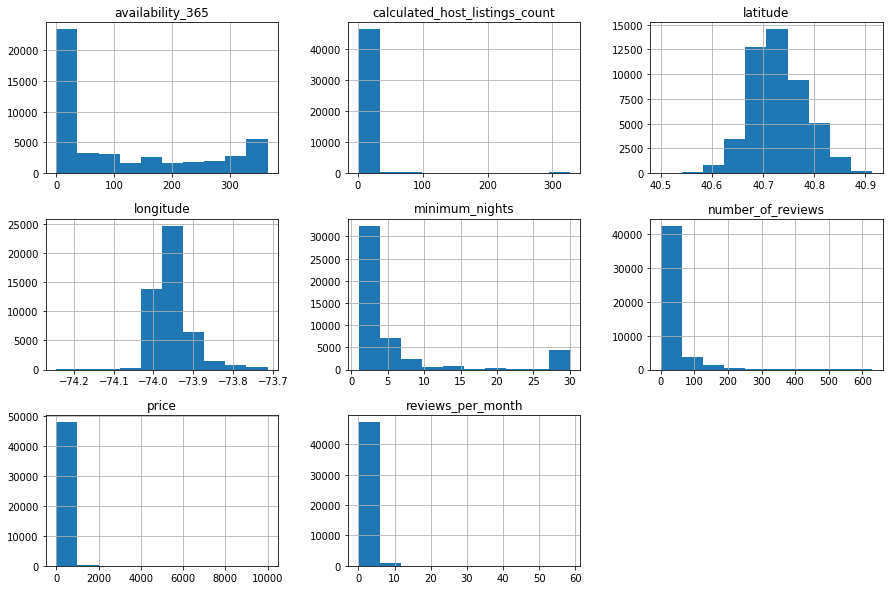

In [19]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

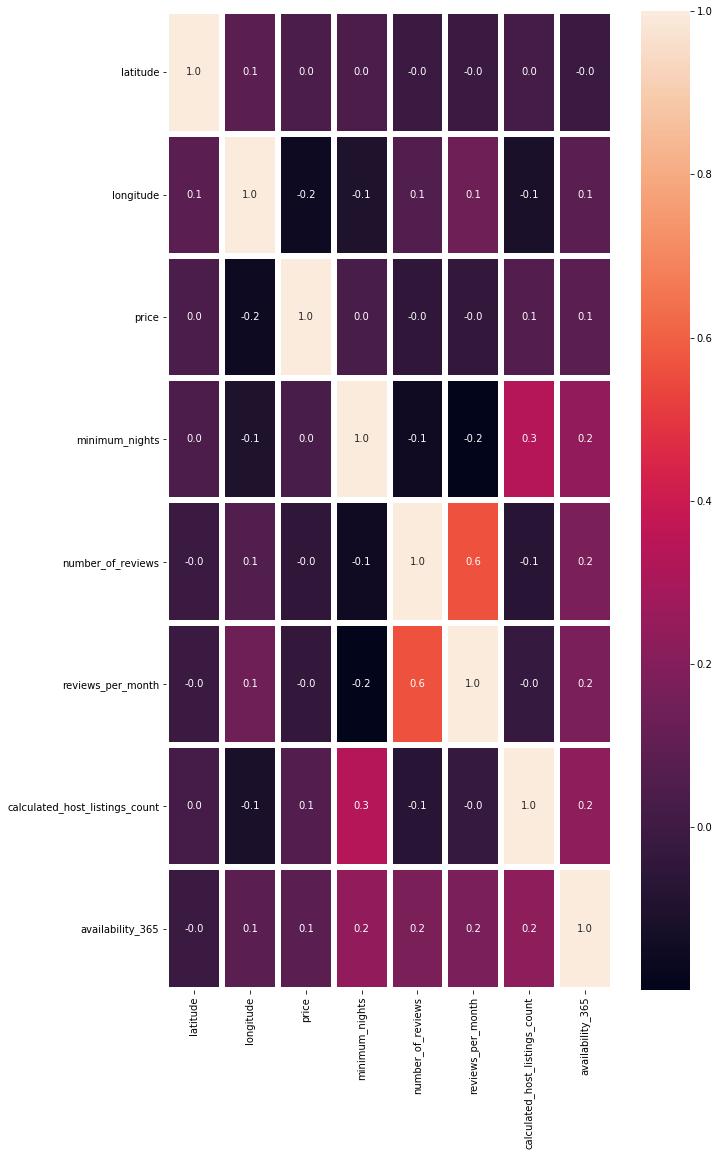

In [20]:
f,ax=plt.subplots(figsize=(10,18))
sns.heatmap(df.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)
plt.show()

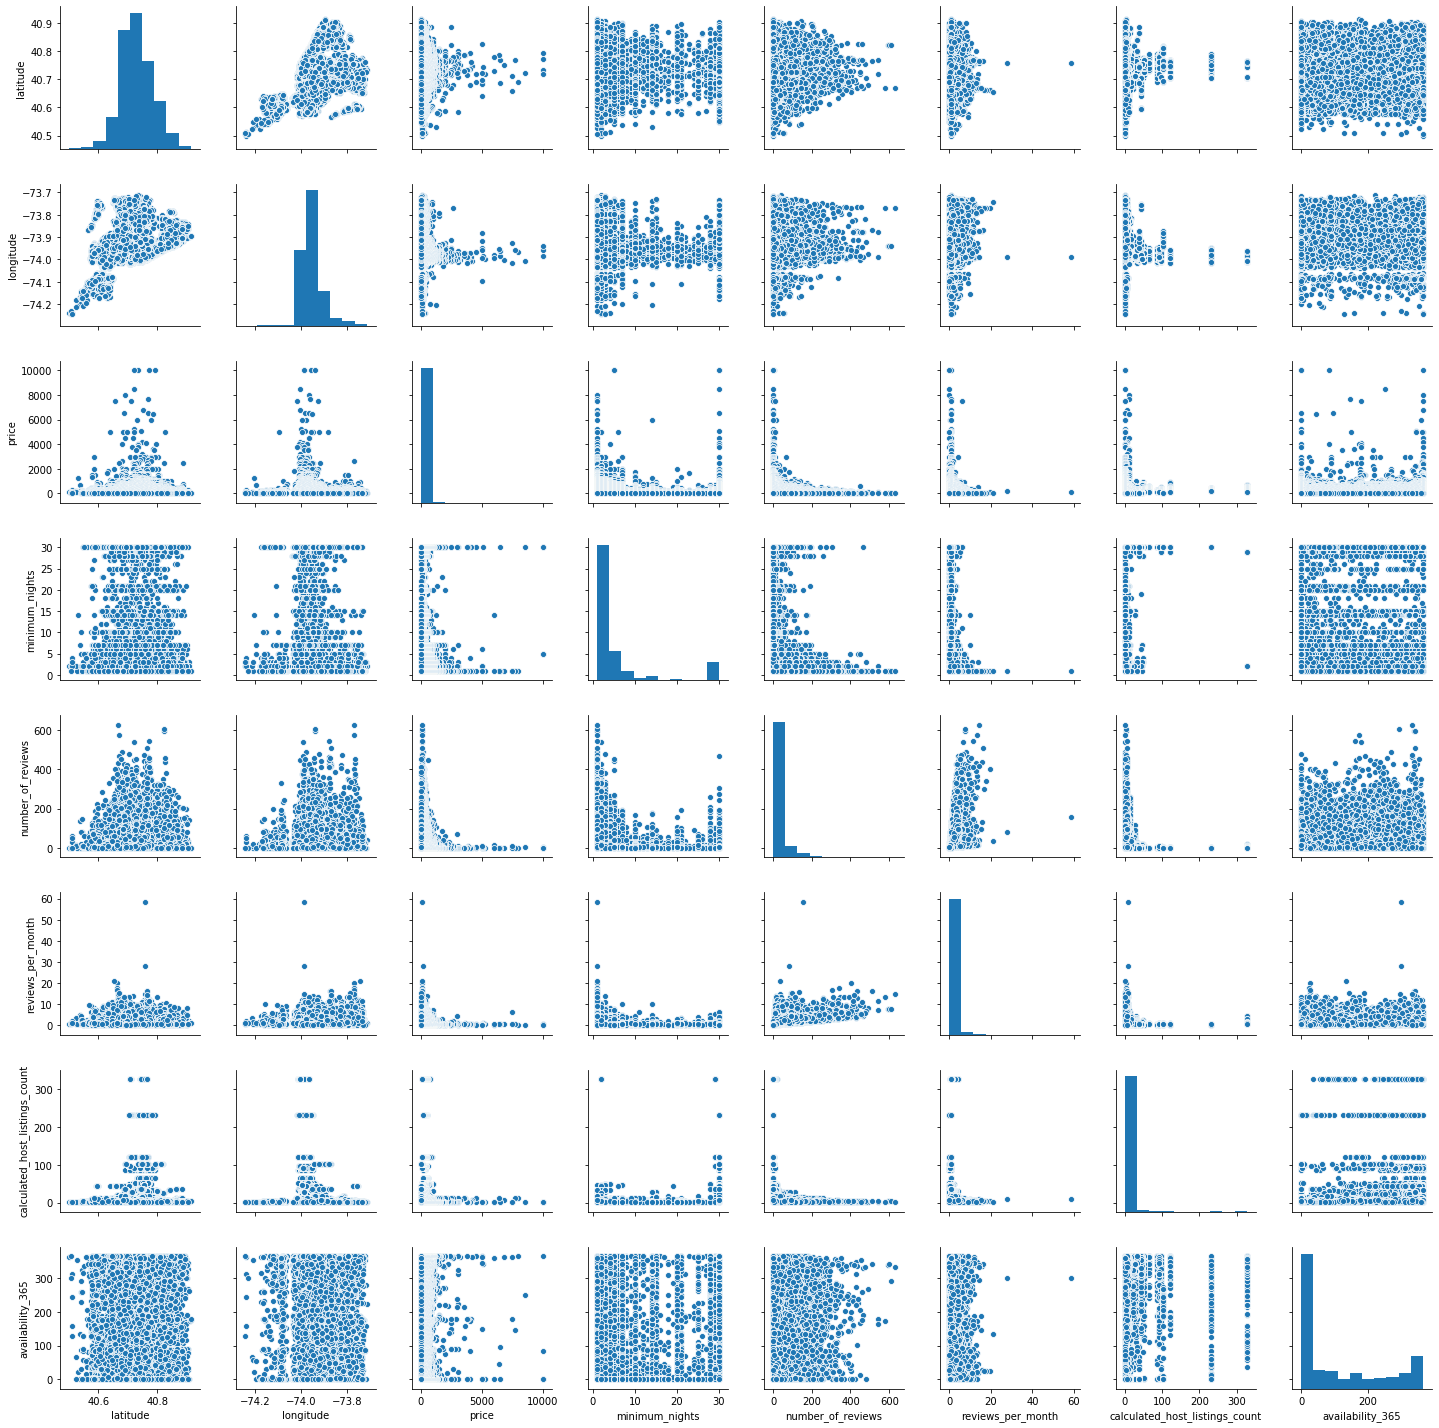

In [21]:
sns.pairplot(df)
plt.show()

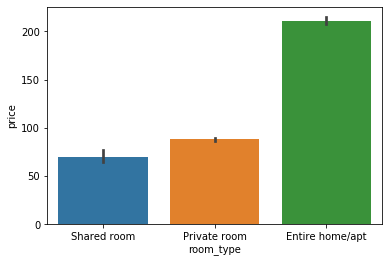

In [22]:
#room_type - price
result = df.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=df, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

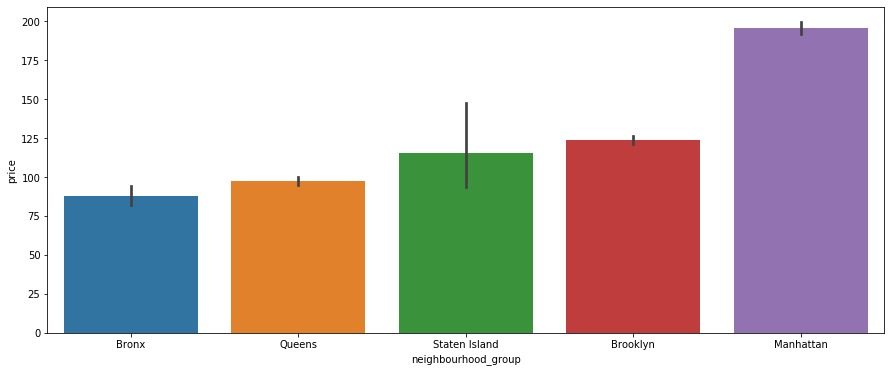

In [23]:
#neighbourhood_group - price
plt.figure(figsize=(15,6))
result = df.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

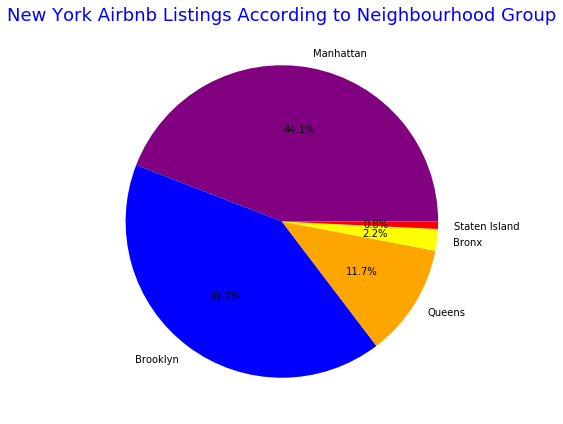

In [24]:
labels = df.neighbourhood_group.value_counts().index
colors = ['purple','blue','orange','yellow','red']
explode = [0,0,0,0,0]
sizes = df.neighbourhood_group.value_counts().values

plt.figure(0,figsize = (7,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('New York Airbnb Listings According to Neighbourhood Group',color = 'blue',fontsize = 18)
plt.show()

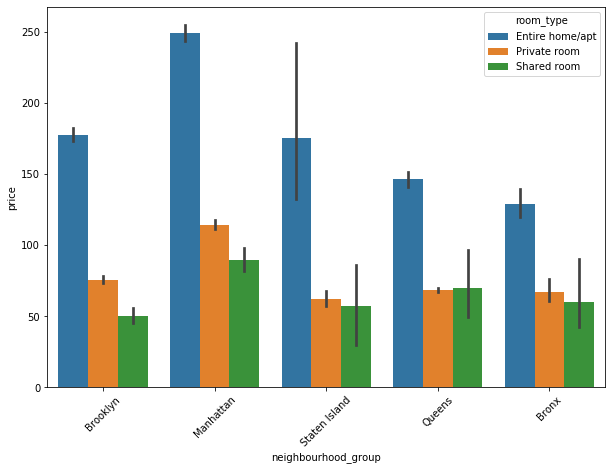

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

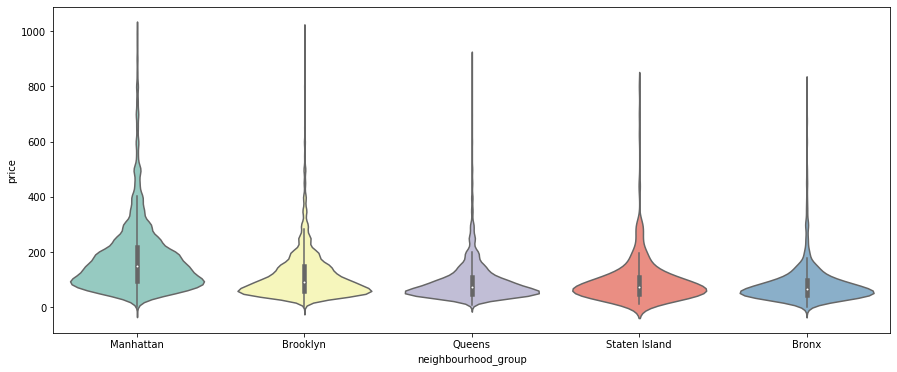

In [26]:
plt.figure(figsize=(15,6))
ax = sns.violinplot(x="neighbourhood_group", y="price",
                    data=df[df.price < 1000],
                    scale="width", palette="Set3")

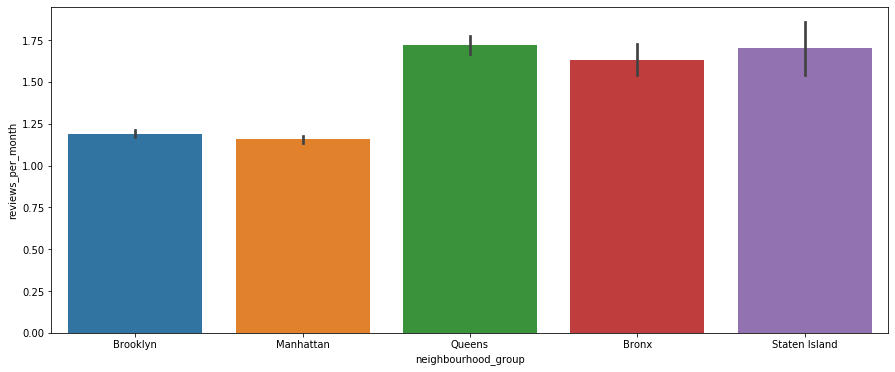

In [27]:
#neighbourhood_group - reviews_per_month
plt.figure(figsize=(15,6))
result = df.groupby(["neighbourhood_group"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x='neighbourhood_group', y="reviews_per_month", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

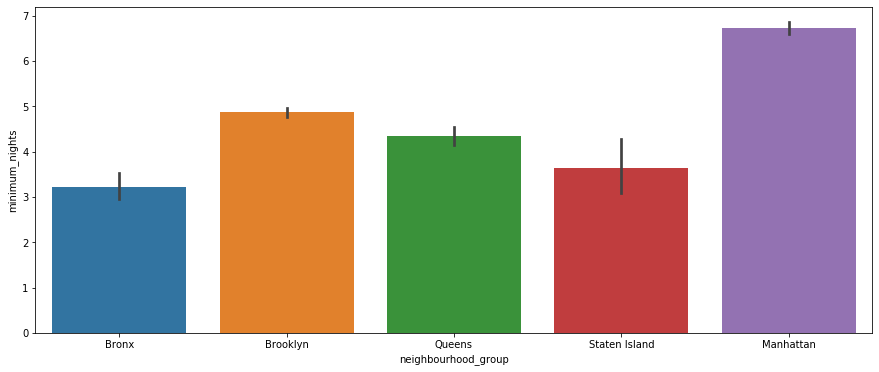

In [28]:
#neighbourhood_group - minimum_nights
plt.figure(figsize=(15,6))
result = df.groupby(["neighbourhood_group"])['minimum_nights'].aggregate(np.median).reset_index().sort_values('minimum_nights')
sns.barplot(x='neighbourhood_group', y="minimum_nights", data=df, order=result['neighbourhood_group']) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.show()

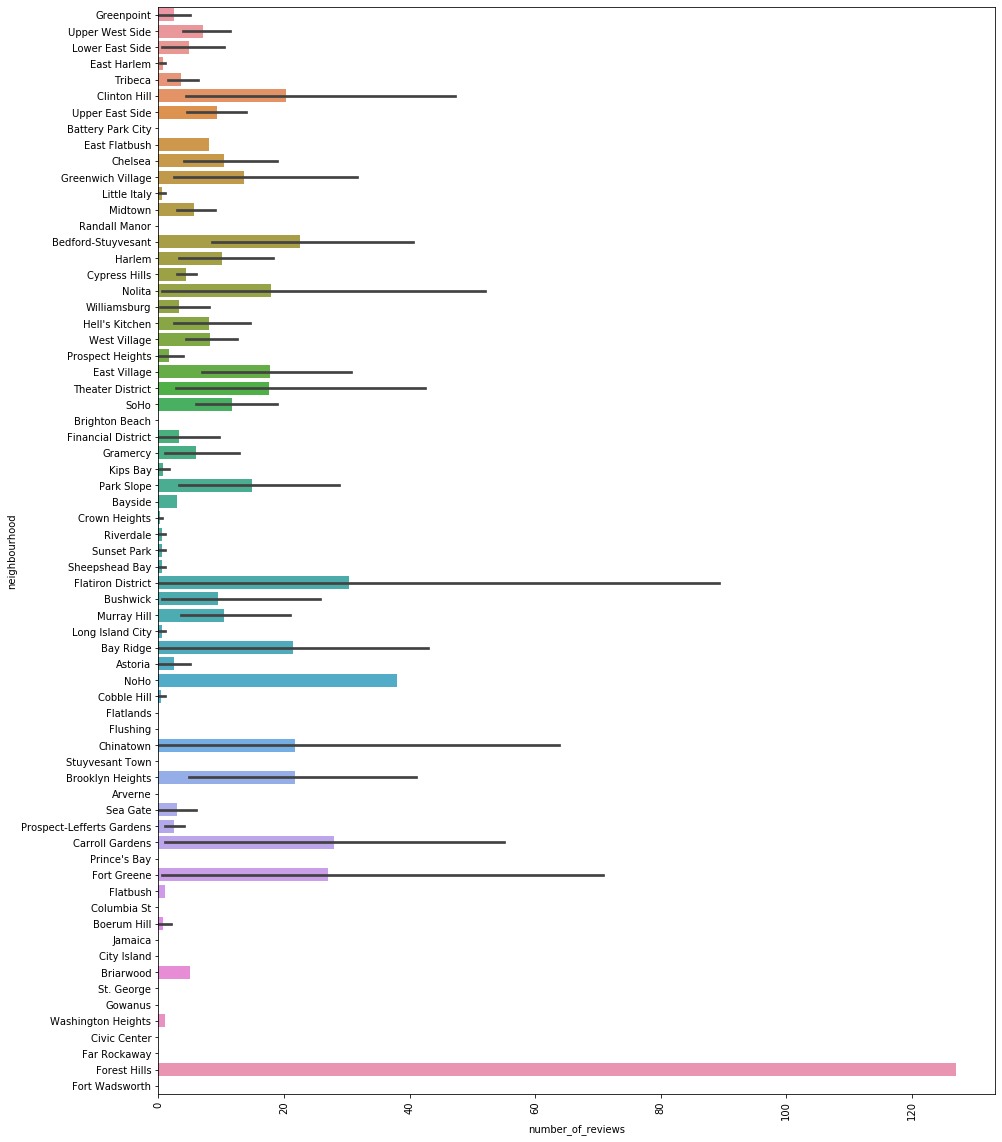

In [29]:
#neighbourhood - number_of_reviews
plt.figure(figsize=(15,20))
#result = df.groupby(["neighbourhood"])['number_of_reviews'].aggregate(np.median).reset_index().sort_values('number_of_reviews')
sns.barplot(x=df.number_of_reviews[:500], y=df.neighbourhood[:500]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

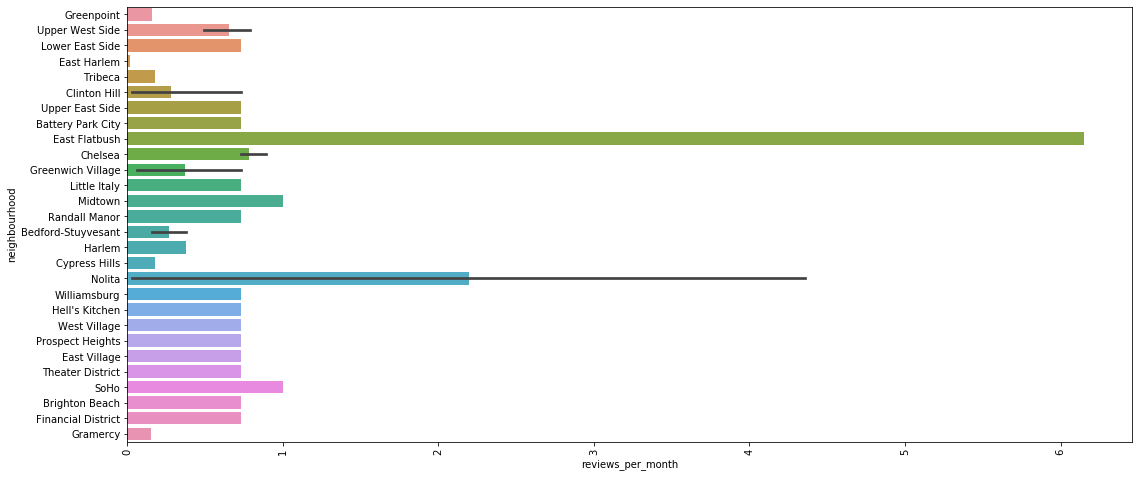

In [30]:
#neighbourhood - reviews_per_month
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['reviews_per_month'].aggregate(np.median).reset_index().sort_values('reviews_per_month')
sns.barplot(x=df.reviews_per_month[:50], y=df.neighbourhood[:50]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

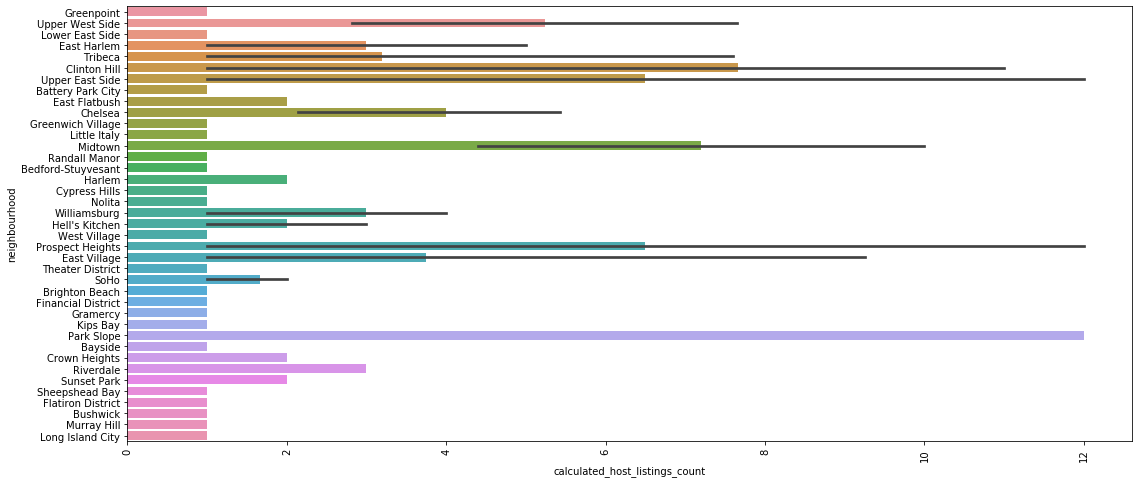

In [31]:
#neighbourhood - calculated_host_listings_count
plt.figure(figsize=(18,8))
#result = df.groupby(["neighbourhood"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')
sns.barplot(x=df.calculated_host_listings_count[:100], y=df.neighbourhood[:100]) #formerly: sns.barplot(x='Id', y="Speed", data=df, palette=colors, order=result['Id'])
plt.xticks(rotation=90)
plt.show()

In [32]:
df_rich_hosts=pd.DataFrame(df.iloc[:,0:2])
df_rich_hosts['latitude']=df.iloc[:,3]
df_rich_hosts['longitude']=df.iloc[:,4]
df_rich_hosts['room_type']=df.iloc[:,5]
df_rich_hosts['price']=df.iloc[:,6]
df_rich_hosts.head()

,name,neighbourhood_group,latitude,longitude,room_type,price
0,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,40.73260,-73.95739,Entire home/apt,10000
1,1-BR Lincoln Center,Manhattan,40.77213,-73.98665,Entire home/apt,10000
2,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,40.71980,-73.98566,Entire home/apt,9999
3,Spanish Harlem Apt,Manhattan,40.79264,-73.93898,Entire home/apt,9999
4,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,40.72197,-74.00633,Entire home/apt,8500


In [33]:
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [34]:
df[df.room_type=="Private room"].describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,22100.0,40.729223,0.058236,40.49979,40.68928,40.717755,40.764682,40.91306
longitude,22100.0,-73.942804,0.048108,-74.24285,-73.96970,-73.948050,-73.925130,-73.71299
price,22100.0,88.069186,121.767427,0.00000,50.00000,70.000000,95.000000,7500.00000
minimum_nights,22100.0,4.386063,6.781423,1.00000,1.00000,2.000000,4.000000,30.00000
number_of_reviews,22100.0,24.283077,47.452321,0.00000,1.00000,5.000000,25.000000,629.00000
reviews_per_month,22100.0,1.303371,1.645710,0.01000,0.30000,0.730000,1.670000,58.50000
calculated_host_listings_count,22100.0,3.237738,10.263493,1.00000,1.00000,1.000000,2.000000,327.00000
availability_365,22100.0,110.657421,131.897819,0.00000,0.00000,44.000000,212.000000,365.00000


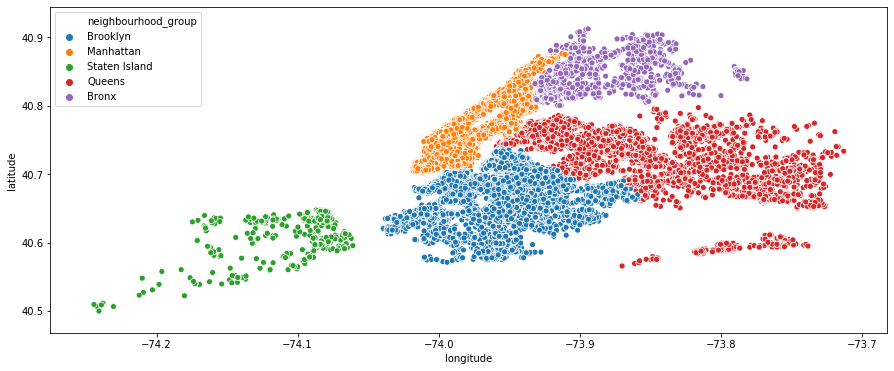

In [35]:
plt.figure(figsize=(15,6))
sns.scatterplot(df_rich_hosts.longitude,df_rich_hosts.latitude,hue=df_rich_hosts.neighbourhood_group)
plt.ioff()

#how do i rotate this 90 degrees?

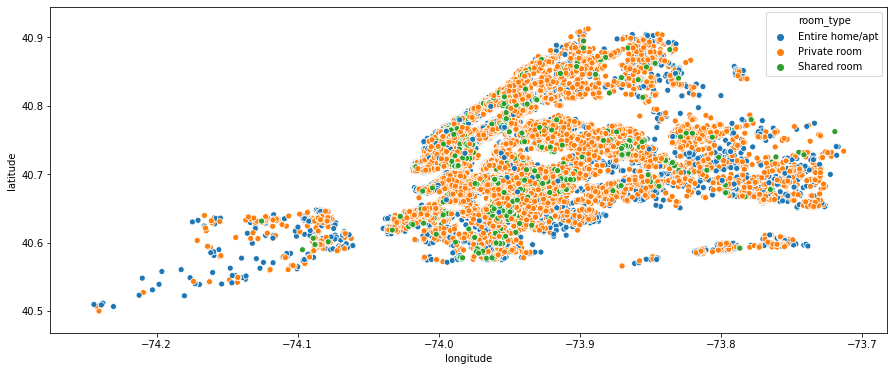

In [36]:
plt.figure(figsize=(15,6))
sns.scatterplot(df_rich_hosts.longitude,df_rich_hosts.latitude,hue=df_rich_hosts.room_type)
plt.ioff()

In [37]:
print(df.latitude.max())
print(df.latitude.min())
print(df.longitude.max())
print(df.longitude.min())

40.913059999999994
40.499790000000004
-73.71299
-74.24441999999999


In [38]:
import folium
from folium.plugins import HeatMap
m=folium.Map([40.67,-73.8],zoom_start=10)
HeatMap(df_rich_hosts[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

In [39]:
qn_price = 150
meu_price = df['price'].mean()
sima_price = df['price'].std()
var_price = df['price'].var()
print(meu_price)
print(var_price)
print(sima_price)

151.38421118218827
51150.35037440682
226.1644321603351


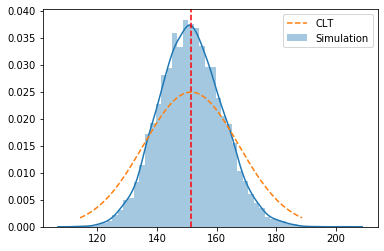

In [40]:
#to figure out the sampling distribution of sample mean, given the null hypothesis is correct

repeat = 10000
sam_size = 200
simu_sample = np.random.exponential(meu_price, size = (repeat, sam_size))
simu_sample_mean = np.mean(simu_sample, axis = 1) 

xx = np.linspace(sps.norm.ppf(0.01, loc = meu_price, scale = (var_price/sam_size)**0.5), 
                 sps.norm.ppf(0.99, loc = meu_price, scale = (var_price/sam_size)**0.5), 10000)

sns.distplot(simu_sample_mean, label = 'Simulation')
plt.axvline(x = meu_price, ls = '--', color = "r")
plt.plot(xx, sps.norm.pdf(xx, loc = meu_price, scale = (var_price/sam_size)**0.5), ls = '--', label = 'CLT')
plt.legend(loc = "best")
plt.show()

The lower endpoint of the rejection region by simulation is 169.11285294479666
The lower endpoint of the rejection region by CLT approximation is 177.6891057486148


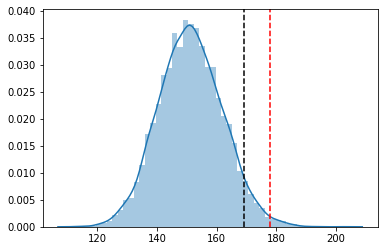

In [41]:
print("The lower endpoint of the rejection region by simulation is", np.percentile(simu_sample_mean, 95)) 
print("The lower endpoint of the rejection region by CLT approximation is", 
      sps.norm.ppf(0.95, loc = meu_price, scale = (var_price/sam_size)**0.5)) 

sns.distplot(simu_sample_mean)
plt.axvline(x = np.percentile(simu_sample_mean, 95), ls = '--', color = "k")
plt.axvline(x = sps.norm.ppf(0.95, loc = meu_price, scale = (var_price/sam_size)**0.5), ls = '--', color = "r")
plt.show()

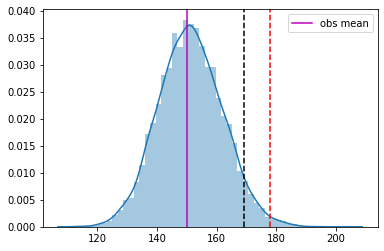

In [42]:
sns.distplot(simu_sample_mean)
plt.axvline(x = np.percentile(simu_sample_mean, 95), ls = '--', color = "k")
plt.axvline(x = sps.norm.ppf(0.95, loc = meu_price, scale = (var_price/sam_size)**0.5), ls = '--', color = "r")
plt.axvline(x = qn_price, color = "m", label = "obs mean")
plt.legend(loc = "best")
plt.show()

In [43]:
CLT_p_value = 1- sps.norm.cdf(qn_price, loc = meu_price, scale = (var_price/sam_size)**0.5)
Simu_p_value = (np.sum(simu_sample_mean > qn_price) / len(simu_sample_mean))
print("p-value based on CLT is", CLT_p_value)
print("p-value based on simulation is", Simu_p_value)

p-value based on CLT is 0.5344874518244401
p-value based on simulation is 0.5411


not really sure what does this p-value mean for our null hypothesis...

In [44]:
import statsmodels.formula.api as smf

In [45]:
model = smf.ols('name ~ price',
                data=df)                                  # Specify the datasets

results = model.fit()                                       # Fit the model
print(results.summary())                                    # Show the report of results

KeyboardInterrupt: 